# Mudcard

- **I understand that gradient descent finds the derivative at a certain weight and moves along the loss function L(w) in the direction of descending slope, but I don't really understand how the model knows the derivative at that point. If, mathematically, we could find the derivative of the loss function, then couldn't we just set that derivative to 0, and find the minimum? I was thinking that maybe the derivatives found with gradient descent are only local derivatives. But if that is the case, how are those local derivatives found?**
    - If you have a regression problem and use MSE as your loss function, you can indeed calculate the derivative of the MSE and set it to 0, and analytically find the minimum. That's exactly what the Least Squares algorithm does.
    - If you have a classification problem and use the logloss metric, an analytical solution doesn't exist because the logloss metric is too complex for that. Consider that the logloss metric for a datapoint depends on whether the true target variable is 0 or 1. This complicates things quite a bit.
    - If an analytical solution doesn't exist for some reason, we have to use numerical solutions like gradient descent.
    - And you are correct, we calculate local derivaties at a set w value only. Local gradients can be calculated analytically and this is much easier to do than to calculate where the derivative of L(w) is 0 for any w.
    - All this is handled by sklearn for you though. If you want to learn more about how optimization algorithms like gradient descent works, I highly recommend taking CSCI1420 or DATA2060. You will learn about the equations and numeral algorithms in detail and you'll implement these techniques from scratch in the homework assignments.

# Lecture 12 Mud Card
- **I wanted to make a quick clarification. Does cross-validation refer to multiple different things? I remember we learned the k-fold splitting process as cross val and we've recently also been calling hyperparameter tuning also cross val. Is it just a general term that describes model evaluation methods?**
    - Yes, cross-validation or hyperparameter tuning are the same thing. How the data splitting is performed can change. You can do k-fold, you can do the basic train/val/test split, groupkfold, time series split, etc. 

## Regularization

By the end of this lecture, you will be able to
- Describe why regularization is important and what are the two types of regularization
- Describe how regularized linear regression works
- Describe how regularized logistic regression works


## <font color='LIGHTGRAY'>Regularization</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **Describe why regularization is important and what are the two types of regularization**
- <font color='LIGHTGRAY'>Describe how regularized linear regression works</font>
- <font color='LIGHTGRAY'>Describe how regularized logistic regression works</font>


# Polynomial regression
## Let's work with a new example dataset

(40, 1)
(40,)


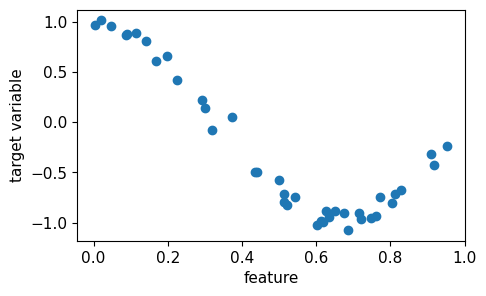

In [1]:
# load packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib
matplotlib.rcParams.update({'font.size': 11})

df = pd.read_csv('data/regularization_example.csv')
X_ori = df['x0'].values.reshape(-1, 1)
y = df['y'].values
print(np.shape(X_ori))
print(np.shape(y))

# visualize the data
plt.figure(figsize=(5,3))
plt.scatter(X_ori,y)
plt.xlabel('feature')
plt.ylabel('target variable')
plt.show()

In [2]:
# lets generate more features because a linear model will obviously be insufficient to fit the data well
pf = PolynomialFeatures(degree = 20,include_bias=False)
X = pf.fit_transform(X_ori)
print(np.shape(X))
print(pf.get_feature_names_out())

(40, 20)
['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10'
 'x0^11' 'x0^12' 'x0^13' 'x0^14' 'x0^15' 'x0^16' 'x0^17' 'x0^18' 'x0^19'
 'x0^20']


## We split data into train and validation!

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
print(np.shape(X_train),np.shape(y_train))
print(np.shape(X_val),np.shape(y_val))

(32, 20) (32,)
(8, 20) (8,)


## Let's train and validate some linear regression models

### Use the first feature only

intercept: 0.8018842867499774
w: [-2.08151827]
train MSE: 0.13964692457239297
val MSE: 0.1714251606233729


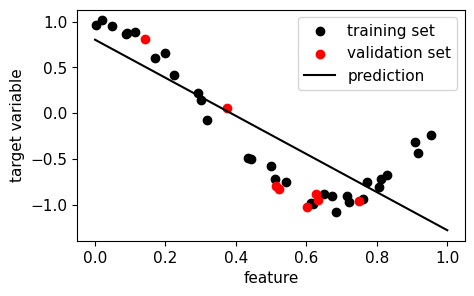

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# let's use only the first feature
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train[:,:1], y_train)
print('intercept:',linreg.intercept_)
print('w:',linreg.coef_)

train_MSE = mean_squared_error(y_train,linreg.predict(X_train[:,:1]))
val_MSE = mean_squared_error(y_val,linreg.predict(X_val[:,:1]))
print('train MSE:',train_MSE)
print('val MSE:',val_MSE)


# let's visualuze the model
x_model = np.linspace(0,1,100)
plt.figure(figsize=(5,3))
plt.scatter(X_train[:,0],y_train,color='k',label='training set')
plt.scatter(X_val[:,0],y_val,color='r',label='validation set')
plt.plot(x_model,linreg.predict(x_model.reshape(-1,1)),color='k',label='prediction')
plt.xlabel('feature')
plt.ylabel('target variable')
plt.legend()
plt.show()


### Use all features

intercept: 0.9838109622296358
ws: [-8.87590253e+00  1.32448462e+03 -6.14090972e+04  1.34771841e+06
 -1.68039780e+07  1.27546841e+08 -5.73986542e+08  1.04281604e+09
  4.66015355e+09 -4.48420794e+10  1.90573875e+11 -5.36959347e+11
  1.09496346e+12 -1.66249557e+12  1.88797012e+12 -1.58518464e+12
  9.56119420e+11 -3.92014630e+11  9.78510407e+10 -1.12226671e+10]
train MSE: 0.0022226648575450402
val MSE: 0.03310570683050522


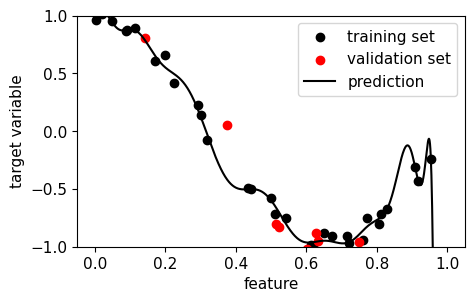

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# use all features
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)
print('intercept:',linreg.intercept_)
print('ws:',linreg.coef_)

train_MSE = mean_squared_error(y_train,linreg.predict(X_train))
val_MSE = mean_squared_error(y_val,linreg.predict(X_val))
print('train MSE:',train_MSE)
print('val MSE:',val_MSE)


# let's visualuze the model
x_model = np.linspace(0,1,1000)
plt.figure(figsize=(5,3))
plt.scatter(X_train[:,0],y_train,color='k',label='training set')
plt.scatter(X_val[:,0],y_val,color='r',label='validation set')
plt.plot(x_model,linreg.predict(pf.transform(x_model.reshape(-1,1))),color='k',label='prediction')
plt.ylim([-1,1])
plt.xlabel('feature')
plt.ylabel('target variable')
plt.legend()
plt.show()


## What to do?
- the model is visibly performs poorly when only the original feature is used
- the model performs very good on the training set but poorly on the validation set when all features are used
    - the ws are huge!

## Regulazation solves this problem!


## <font color='LIGHTGRAY'>Regularization</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe why regularization is important and what are the two types of regularization</font>
- **Describe how regularized linear regression works**
- <font color='LIGHTGRAY'>Describe how regularized logistic regression works</font>


## Regularization to the rescue!
- let's change the cost function and add a <font color='RED'>penalty term</font> for large ws
- **Lasso regression**: regularize using the l1 norm of w:
   
<center> $L(w) = \frac{1}{n}\sum_{i=1}^{n}[(w_0 + \sum_{j=1}^{m} w_j  x_{ij}- y_i)^2] + \color{red}{ \alpha \sum_{j=0}^{m}|w_j|}$</center>   
   
- **Ridge regression**: regularize using the square of the l2 norm of w:
   
<center>$L(w) = \frac{1}{n}\sum_{i=1}^{n}[(w_0 + \sum_{j=1}^{m} w_j  x_{ij}- y_i)^2] + \color{red}{\alpha \sum_{j=0}^{m} w_j^2}$</center>

- $\alpha$ is the regularization parameter (positive number), it describes how much we penalize large ws

- With the cost function changed, the derivatives in gradient descent need to be updated too!

## Feature selection with Lasso regularization
- Least Absolute Shrinkage and Selection Operator
- cost = MSE + $\alpha$ * l1 norm of $w$
<center>$L(w) = \frac{1}{n}\sum_{i=1}^{n}[(w_0 + \sum_{j=1}^{m} w_j  x_{ij}- y_i)^2] + \color{red}{ \alpha \sum_{j=0}^{m}|w_j|}$</center>  
- ideal for feature selection
- as $\alpha$ increases, more and more feature weights are reduced to 0.

In [6]:
from  sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = np.logspace(-7,0,29)
ws = []
models = []
train_MSE = np.zeros(len(alpha))
val_MSE = np.zeros(len(alpha))

# do the fit
for i in range(len(alpha)):
    # load the linear regression model
    lin_reg = Lasso(alpha=alpha[i],max_iter=100000000)
    lin_reg.fit(X_train, y_train)
    ws.append(lin_reg.coef_)
    models.append(lin_reg)
    train_MSE[i] = mean_squared_error(y_train,lin_reg.predict(X_train))
    val_MSE[i] = mean_squared_error(y_val,lin_reg.predict(X_val))

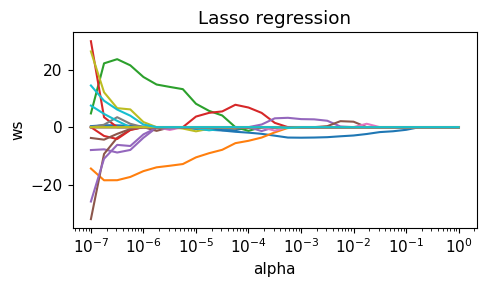

In [7]:
plt.figure(figsize=(5,3))
plt.plot(alpha, ws)
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('ws')
plt.title('Lasso regression')
plt.tight_layout()
plt.savefig('figures/lasso_coefs.png',dpi=300)
plt.show()

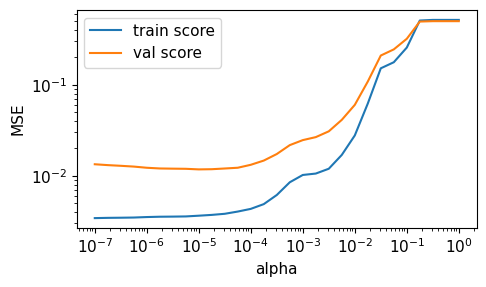

In [8]:
plt.figure(figsize=(5,3))
plt.plot(alpha,train_MSE,label='train score')
plt.plot(alpha,val_MSE,label='val score')
plt.semilogy()
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
plt.savefig('figures/train_val_MSE_lasso.png',dpi=300)
plt.show()

## Bias vs variance
- Bias: the model performs poorly on both the train and validation sets
    - high alpha in our example
- the model performs very well on the training set but it performs poorly on the validation set
    - low alpha in our example
    - lowering the alpha further would improve the train score but the validation score would increase
    - we don't do it because of convergence issues

# The bias-variance trade off
- the curve of the validation score as a function of a hyper-parameter usually has a U shape if evaluation metric needs to be minimized, or an inverted U if the metric needs to be maximized
- choose the hyper-parameter value that gives you the best validation score

##  Quiz
Which alpha value gives the best validation score? Visualize the corresponding model! 

In [9]:
np.argmin(val_MSE)

8

In [10]:
print(alpha[np.argmin(val_MSE)])

1e-05


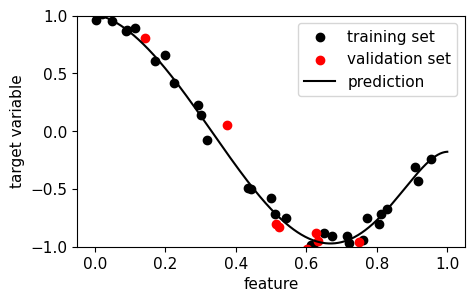

In [11]:
alpha[np.argmin(val_MSE)]

x_model = np.linspace(0,1,1000)
plt.figure(figsize=(5,3))
plt.scatter(X_train[:,0],y_train,color='k',label='training set')
plt.scatter(X_val[:,0],y_val,color='r',label='validation set')
plt.plot(x_model,models[np.argmin(val_MSE)].predict(pf.transform(x_model.reshape(-1,1))),color='k',label='prediction')
plt.ylim([-1,1])
plt.xlabel('feature')
plt.ylabel('target variable')
plt.legend()
plt.show()


## The bias-variance tradeoff with Ridge regularization
- cost = MSE + $\alpha$ * (l2 norm of $w$)^2
<center>$L(w) = \frac{1}{n}\sum_{i=1}^{n}[(w_0 + \sum_{j=1}^{m} w_j  x_{ij}- y_i)^2] + \color{red}{\alpha \sum_{j=0}^{m} w_j^2}$</center>

- as $\alpha$ approaches 0, we reproduce the linear regression weights
- small $\alpha$ creates high variance
- large $\alpha$ creates high bias

In [12]:
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alpha = np.logspace(-10,0,51)

# arrays to save train and test MSE scores
train_MSE = np.zeros(len(alpha))
val_MSE = np.zeros(len(alpha))

ws = []
models = []
# do the fit
for i in range(len(alpha)):
    # load the linear regression model
    lin_reg = Ridge(alpha=alpha[i])
    lin_reg.fit(X_train, y_train)
    models.append(lin_reg)
    ws.append(lin_reg.coef_)
    models.append(lin_reg)
    # train and test scores
    train_MSE[i] = mean_squared_error(y_train,lin_reg.predict(X_train))
    val_MSE[i] = mean_squared_error(y_val,lin_reg.predict(X_val))

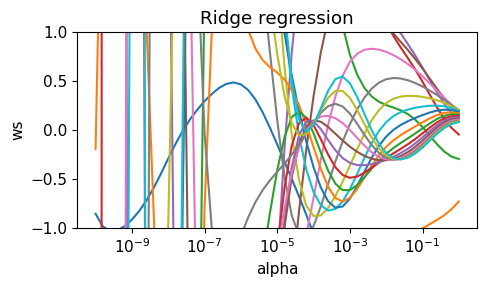

In [13]:
plt.figure(figsize=(5,3))
plt.plot(alpha, ws) 
plt.semilogx()
plt.ylim([-1e0,1e0])
plt.xlabel('alpha')
plt.ylabel('ws')
plt.title('Ridge regression')
plt.tight_layout()
plt.savefig('figures/ridge_coefs.png',dpi=300)
plt.show()

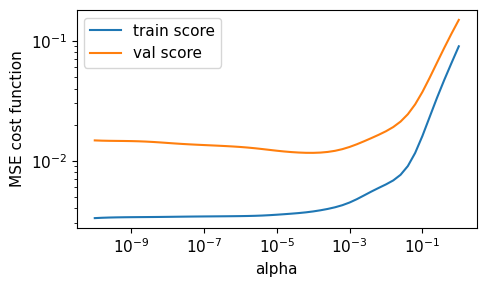

In [14]:
plt.figure(figsize=(5,3))
plt.plot(alpha,train_MSE,label='train score')
plt.plot(alpha,val_MSE,label='val score')
plt.semilogy()
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('MSE cost function')
plt.legend()
plt.tight_layout()
plt.savefig('figures/train_val_MSE_ridge.png',dpi=300)
plt.show()

## Quiz
Which $\alpha$ gives us the best tradeoff between bias and variance?

In [15]:
np.argmin(val_MSE)

30

In [16]:
print(alpha[np.argmin(val_MSE)])

0.0001


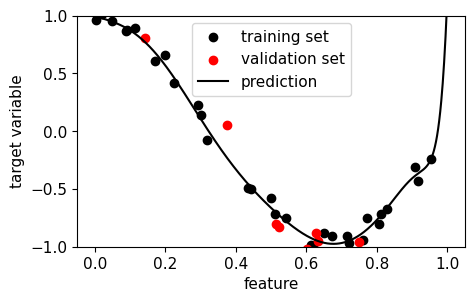

In [17]:
alpha[np.argmin(val_MSE)]

x_model = np.linspace(0,1,1000)
plt.figure(figsize=(5,3))
plt.scatter(X_train[:,0],y_train,color='k',label='training set')
plt.scatter(X_val[:,0],y_val,color='r',label='validation set')
plt.plot(x_model,models[0].predict(pf.transform(x_model.reshape(-1,1))),color='k',label='prediction')
plt.ylim([-1,1])
plt.xlabel('feature')
plt.ylabel('target variable')
plt.legend()
plt.show()



## <font color='LIGHTGRAY'>Regularization</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe why regularization is important and what are the two types of regularization</font>
- <font color='LIGHTGRAY'>Describe how regularized linear regression works</font>
- **Describe how regularized logistic regression works**





## Logistic regression
- Recap: the logloss metric is the cost function

<center> $$L(w) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(y_i') + (1-y_i)\ln(1-y_i')]$$ </center>
<center>$L(w) =  - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}})]$</center>

   - the logloss metric with l1 regularization

<center>$L(w) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}}))] + \color{red}{ \alpha \sum_{j=0}^{m}|w_j|}$</center>

   - the logloss metric with l2 regularization

<center>$L(w) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}}))] + \color{red}{\alpha \sum_{j=0}^{m} w_j^2}$</center>

## Logistic regression in sklearn

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg_l1 = LogisticRegression(penalty='l1', C = 1/alpha) # C is the inverse of the regularization strength
log_reg_l2 = LogisticRegression(penalty='l2', C = 1/alpha)
# fit, predict, predict_proba are available 
# log_reg.coef_ returns the w values


In [19]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

# Mudcard